In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

# Reading f and g data for 3 resolutions

In [14]:
res=[1,2,3]

dataf=[]
datag=[]

for resolution in res:
    dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TestModel/DATA/res{}".format(resolution)

    print(dir)
    
    count=0
    for path in os.listdir(dir):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir, path)):
            count += 1
    print('File count in dir', dir, 'is: ', count)


    f=[]
    g=[]
    #iterate over files in dir
    for i in range(count):
        with pd.option_context('display.precision', 20):
            df = pd.read_csv(dir + "/time_step{}.csv".format(i), header=None, dtype = str)
        #print(df)
        #print("{0:.19f}".format(df[0][0]))
        df = df.to_numpy()
        df = np.transpose(df)
        #print(type(df[0]))
        aux = [float(x) for x in df[0]]
        f.append(aux)
        aux = [float(x) for x in df[1]]
        g.append(aux)

    # f[i] is the array of the values of f on the whole grid on time step i
    
    print('len(f) = ', len(f))

    print('len(f[0]) = ', len(f[0]))
    
    dataf.append(f)
    datag.append(g)

/home/rita13santos/Desktop/MSc Thesis/Git/TestModel/DATA/res1
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/TestModel/DATA/res1 is:  201
len(f) =  201
len(f[0]) =  207
/home/rita13santos/Desktop/MSc Thesis/Git/TestModel/DATA/res2
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/TestModel/DATA/res2 is:  401
len(f) =  401
len(f[0]) =  407
/home/rita13santos/Desktop/MSc Thesis/Git/TestModel/DATA/res3
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/TestModel/DATA/res3 is:  801
len(f) =  801
len(f[0]) =  807


In [15]:
#print(dataf[0][0]) #this is the array of the value of f all over the grid on timestep 0 with resolution 1

#print(dataf[0][1]) #this is the array of the value of f all over the grid on timestep 1 with resolution 1

#print(dataf[1][0]) #this is the array of the value of f all over the grid on timestep 0 with resolution 2
print(len(dataf))

3


In [16]:
print(len(dataf[0][0])) #this gives the number of gridpoints with resolution 1

print(len(dataf[1][0])) #this gives the number of gridpoints with resolution 2

print(len(dataf[0])) #this give the number of timesteps

207
407
201


In [17]:
print(dataf[0][0][1]) # dataf indexes give res, time then gridpoint

0.08675915467721386


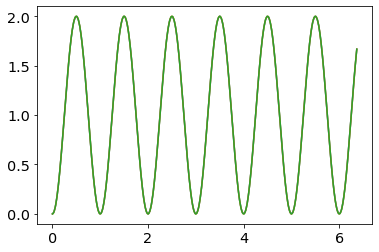

In [18]:
import math

dx1 = 0.2 # this is the dx when the grid has resolution 1
dx2= 0.1
dx3= 0.05

plt_x1 = np.linspace(0, 200, 201) * dx1
plt_x2 = np.linspace(0, 200*2, 200*2+1) * dx2
plt_x3 = np.linspace(0, 200*4, 200*4+1) * dx3

plt.plot(plt_x1/(2*math.pi),dataf[0][0][3:len(dataf[0][0])-3])
plt.plot(plt_x2/(2*math.pi),dataf[1][0][3:len(dataf[1][0])-3])
plt.plot(plt_x3/(2*math.pi),dataf[2][0][3:len(dataf[2][0])-3])

# Styling plots

In [48]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':12,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

# Plotting f with resolutions 1 and 2 and differences 

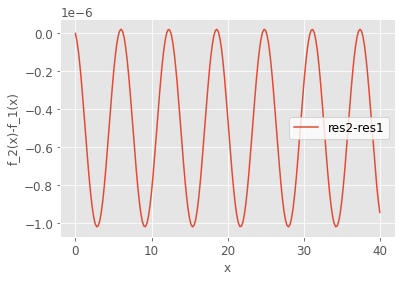

201
401
207
207


In [49]:
# for given t
t1=200 #last timestep
t2=2*t1
t3=4*t1
aux = []
for i in range(len(dataf[1][t2])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(dataf[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
        aux.append(dataf[1][t2][i])
        #print(dataf[1][0][i])

        
dx = 0.2 # this is the dx when the grid has resolution 1

#plt_x = np.linspace(0, 200, 201) * dx
#plt_xx = np.linspace(0, 201+4,200+4) * dx

#subtracting f in both resolutions & ignoring ghost points
diff_f_2_1 = np.subtract(dataf[0][t1][3:len(dataf[0][t1])-3],aux)

#print(diff_f_2_1[1])
#print(dataf[0][0][3]-aux[1])

#plt.plot(plt_x, dataf[0][0][2:len(dataf[0][0])-2], label = 'f')
with plt.style.context('ggplot'):
    plt.plot(plt_x1, diff_f_2_1, label = 'res2-res1')
    #plt.plot(plt_x, dataf[0][0][2:len(dataf[0][0])-2], label = 'f')

plt.legend()
plt.xlabel('x')
plt.ylabel('f_2(x)-f_1(x)')
plt.show()

print(len(dataf[0]))
print(len(dataf[1]))
print(len(dataf[0][0]))
print(len(dataf[0][1]))

Resolution 4

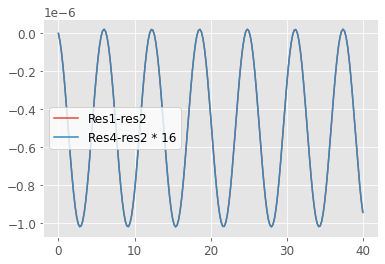

In [50]:
# for given t

aux2 = []
for i in range(len(dataf[2][t3])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(dataf[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
        aux2.append(dataf[2][t3][i])
        


#subtracting f in both resolutions & ignoring ghost points
diff_f_4_2 = np.subtract(aux,aux2)

with plt.style.context('ggplot'):
    plt.plot(plt_x1, diff_f_2_1, label='Res1-res2')
    plt.plot(plt_x1, diff_f_4_2*16, label='Res4-res2 * 16')


#plt.plot(plt_x,dataf[0][0][2:len(dataf[0][0])-2],label='f')


plt.legend()
plt.show()



# Plotting g with resolutions 1 and 2 and differences

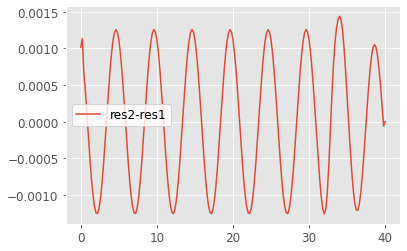

(39.8, 40.2)

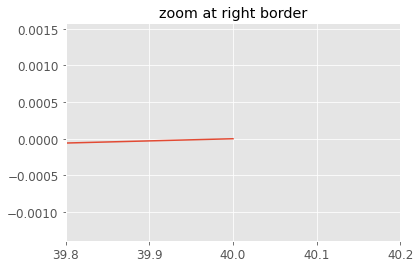

In [51]:
# for given t
t1=200 #last timestep
t2=2*t1
t3=4*t1
aux = []
for i in range(len(datag[1][t2])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(datag[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
        aux.append(datag[1][t2][i])

#subtracting g in both resolutions & ignoring ghost points
diff_g_2_1 = np.subtract(datag[0][t1][3:len(datag[0][t1])-3],aux)

with plt.style.context('ggplot'):
    #plt.title('differences between res 2 and 1 on the common gridpoints')
    plt.plot(plt_x1, diff_g_2_1, label='res2-res1')

plt.legend()
plt.show()


with plt.style.context('ggplot'):
    plt.title('zoom at right border')
    plt.plot(plt_x1, diff_g_2_1, label='res2-res1')

plt.xlim([39.8,40.2])

Resolution 4

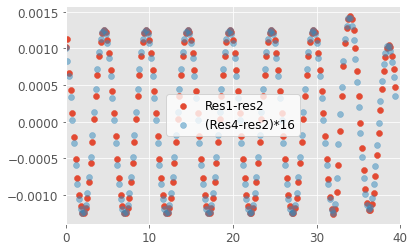

In [52]:
# for given t

aux2 = []
for i in range(len(datag[2][t3])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(datag[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
        aux2.append(datag[2][t3][i])


diff_g_4_2 = np.subtract(aux,aux2)

#plt.plot(plt_x, abs(diff_g_2_1), label='Res1-res2')
#plt.plot(plt_x, abs(diff_g_4_2)*4-2*0.00125, label='Res4-res2')

with plt.style.context('ggplot'):
    plt.scatter(plt_x1[0:len(plt_x1)-3], diff_g_2_1[0:len(plt_x1)-3], label='Res1-res2')
    plt.scatter(plt_x1[0:len(plt_x1)-3], diff_g_4_2[0:len(plt_x1)-3]*16, label='(Res4-res2)*16', alpha=0.5)


plt.xlim([0,40])
plt.legend()
plt.show()

# Pointwise convergence tests: plots for thesis project report 

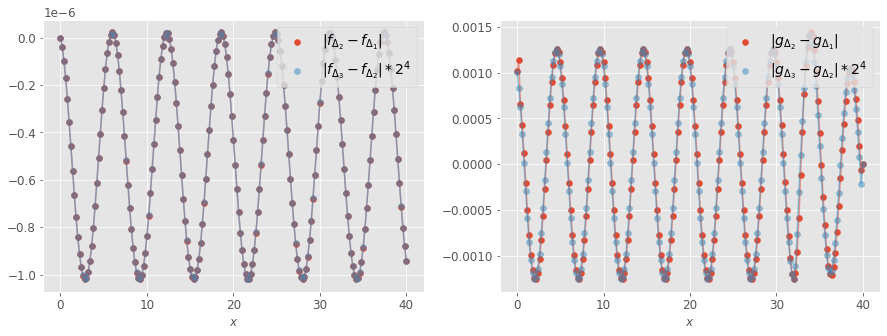

In [53]:
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(1, 2,figsize=(15, 5))

    


with plt.style.context('ggplot'):
    ax[0].scatter(plt_x1, diff_f_2_1, label='$|f_{\Delta_2}-f_{\Delta_1}|$')
    ax[0].scatter(plt_x1, diff_f_4_2*16, label='$|f_{\Delta_3}-f_{\Delta_2}|*2^4$', alpha=0.5)
    ax[0].plot(plt_x1, diff_f_2_1, alpha=0.5)
    ax[0].plot(plt_x1, diff_f_4_2*16, alpha=0.5)

    #ax[0].set_xlim([0,5])
    ax[0].set_xlabel('$x$')
    #ax[0].set_ylabel('$f_{\Delta_1}-f_{\Delta_2}-$', fontsize=15)
    ax[0].legend(fontsize=14,loc='upper right')

    ax[1].scatter(plt_x1[0:len(plt_x1)], diff_g_2_1[0:len(plt_x1)], label='$|g_{\Delta_2}-g_{\Delta_1}|$')
    ax[1].scatter(plt_x1[0:len(plt_x1)], diff_g_4_2[0:len(plt_x1)]*16, label='$|g_{\Delta_3}-g_{\Delta_2}|*2^4$', alpha=0.5)

    ax[1].plot(plt_x1[0:len(plt_x1)], diff_g_2_1[0:len(plt_x1)], alpha=0.5)
    ax[1].plot(plt_x1[0:len(plt_x1)], diff_g_4_2[0:len(plt_x1)]*16, alpha=0.5)

    ax[1].set_xlabel('$x$')
    #ax[1].set_ylabel('g differences',fontsize=15)
    ax[1].legend(fontsize=14,loc='upper right')
    plt.savefig("2ndevenpoint.pdf", format="pdf", bbox_inches="tight")
plt.show()


# L2 norm convergence tests

In [34]:
#for last time step

norm_low_med_f = 0

for i in diff_f_2_1:
    norm_low_med_f += i**2
norm_low_med_f = np.sqrt(norm_low_med_f)

norm_low_med_g = 0

for i in diff_g_2_1:
    norm_low_med_g += i**2
norm_low_med_g = np.sqrt(norm_low_med_g)

norm_med_high_f = 0

for i in diff_f_4_2:
    norm_med_high_f += i**2
norm_med_high_f = np.sqrt(norm_med_high_f)

norm_med_high_g = 0

for i in diff_g_4_2:
    norm_med_high_g += i**2
norm_med_high_g = np.sqrt(norm_med_high_g)



In [35]:
print("f convergence factor:")
print(norm_low_med_f/norm_med_high_f)
print("")
print("g convergence factor:")
print(norm_low_med_g/norm_med_high_g)

f convergence factor:
16.015015182785728

g convergence factor:
0.024873361776957207


# Q(t) 

In [36]:
final_t=len(dataf[2])

rsquarednorm=False

/tmp/ipykernel_28349/2900248670.py:70: RuntimeWarning: invalid value encountered in double_scalars
  Q_g.append(math.log2(norm_low_med[1]/norm_med_high[1]))


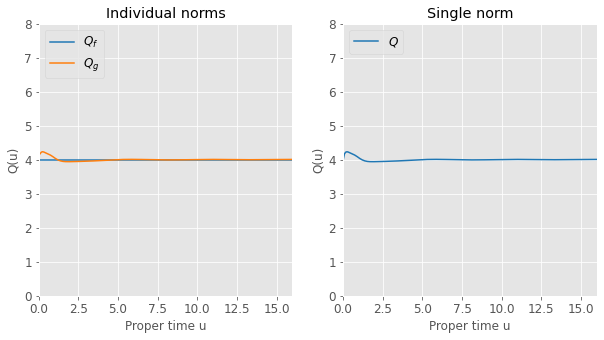

In [43]:
Q_f = []
Q_g = []
Q= []


for t in range(0,int(final_t/4)):
    # for given t
    t1=t #last timestep
    t2=2*t1
    t3=4*t1
    auxf = []
    auxg = []

    for i in range(len(dataf[1][t2])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(dataf[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
            auxf.append(dataf[1][t2][i])
            auxg.append(datag[1][t2][i])
            


    # array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
    diffs_2_1 = []

    #subtracting f in both resolutions & ignoring ghost points
    diffs_2_1.append(np.subtract(dataf[0][t1][3:len(dataf[0][t1])-3],auxf))
    diffs_2_1.append(np.subtract(datag[0][t1][3:len(datag[0][t1])-3],auxg))

    # for given t

    aux2f = []
    aux2g = []
    for i in range(len(dataf[2][t3])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(dataf[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
            aux2f.append(dataf[2][t3][i])
            aux2g.append(datag[2][t3][i])



    #subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
    diffs_4_2 =[]
    diffs_4_2.append(np.subtract(auxf,aux2f))
    diffs_4_2.append(np.subtract(auxg,aux2g))


    ####

    norm_low_med = []
    norm_med_high = []
    single_norm_low_med = []
    single_norm_med_high = []
    s_a=0
    s_b=0

    for j in range(2):
        a = 0
        b = 0
        for i in diffs_2_1[j]:
            a += i**2
            s_a += i**2
        for i in diffs_4_2[j]:
            b += i**2
            s_b += i**2
        norm_low_med.append(np.sqrt(a))
        norm_med_high.append(np.sqrt(b))

    single_norm_low_med=np.sqrt(s_a)
    single_norm_med_high=np.sqrt(s_b)
    
    Q_f.append(math.log2(norm_low_med[0]/norm_med_high[0]))
    Q_g.append(math.log2(norm_low_med[1]/norm_med_high[1]))
    
    Q.append(math.log2(single_norm_low_med/single_norm_med_high))
    ####
    
plt_x = np.linspace(0, 16.0, len(Q_f))
#plt_x = np.linspace(0, int(final_t/4)*dx*step, int(final_t/4))
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(1, 2,figsize=(10, 5))
    
    ax[0].plot(plt_x, Q_f, label = '$Q_f$',color='#1f77b4')
    ax[0].plot(plt_x, Q_g, label = '$Q_g$',color='#ff7f0e')
    
    ax[0].set_ylim([0,8])
    ax[0].set_xlim([0,16])
    ax[0].legend(loc ="upper left")
    ax[0].set_xlabel('Proper time u')
    ax[0].set_ylabel('Q(u)')
    ax[0].set_title('Individual norms')
    
    
    ax[1].plot(plt_x, Q, label = '$Q$',color='#1f77b4')
    #ax[1].plot(x150, Q150, linestyle='dotted',alpha=0.7,color='#1f77b4')
    ax[1].set_ylim([0,8])
    ax[1].set_xlim([0,16.0])
    ax[1].legend(loc ="upper left")
    ax[1].set_title('Single norm')
    #plt.xticks(rotation=45)
    ax[1].set_xlabel('Proper time u')
    ax[1].set_ylabel('Q(u)')


    plt.savefig("2nd.pdf", format="pdf", bbox_inches="tight")
    plt.show()
